In [46]:
import pandas as pd
import numpy as np
from faker import Faker
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [47]:
fake = Faker()

In [48]:
num_customer = 10000
num_transactions = 100000

In [49]:
Customer_id = [fake.uuid4() for _ in range(num_customer)]
Transaction_id = [fake.uuid4() for _ in range(num_transactions)]
Transaction_amount = np.random.uniform(10,100000, num_transactions)
Transaction_type = np.random.choice(['Deposit','Withdrawal'],num_transactions)
Transaction_date = [fake.date_between(start_date = '-1y',end_date='today')for _ in range(num_transactions)]

In [50]:
data = pd.DataFrame({
    'Customer_id': np.random.choice(Customer_id, num_transactions),
    'Transaction_id': Transaction_id,
    'Transaction_amount': Transaction_amount,
    'Transaction_type': Transaction_type,
    'Transaction_date': Transaction_date
})

In [51]:
data.to_csv("synthetic_customer_data.csv", index = False)

In [52]:
df=pd.read_csv("synthetic_customer_data.csv")
df

,Customer_id,Transaction_id,Transaction_amount,Transaction_type,Transaction_date
0,0b077907-c4b8-4bb5-91cf-b8a40581516b,b705bca9-c837-47d4-b051-6c6ffa1d2c75,77679.476714,Withdrawal,2024-06-20
1,42e03f54-f583-4fa0-8a72-c6dd3ed69a0c,aee06b63-875d-423f-9c69-cb65f57e6312,26299.187084,Deposit,2024-07-28
2,1b477fdb-d898-408e-8662-261465d3d352,3355eae3-ca7d-44fb-a189-82eddebf22cf,66671.495126,Withdrawal,2024-03-04
3,ff793781-e61c-4422-87ed-dcf4db551465,0138be17-f79f-452b-9aed-ddeae649f28f,66106.460931,Deposit,2024-03-27
4,e74284f6-a929-4e2c-9efc-a21fad61ae72,adc5a4c6-b505-477b-9090-a2c5e6e37528,92359.943637,Withdrawal,2024-04-19
...,...,...,...,...,...
99995,f09e1ebe-eca7-4546-8b58-030fc167180f,5e61e1df-ba1b-4ae3-b64e-7bda72448b6f,56047.805220,Deposit,2025-01-20
99996,3e6db8d8-119e-489e-8163-478fb69a638f,6a7fa2bb-db50-4aa1-aa71-da64a119e6e9,25567.477449,Withdrawal,2024-08-02
99997,b222fad2-3768-4579-84ce-247c99a2cd40,355572c1-b21f-4e9c-88b9-852eeba9499e,19108.809903,Deposit,2024-09-24
99998,e5395089-b31e-45bb-8f37-4166a9897678,f4da5ba8-3fc2-467a-8c9b-f8366115ed1b,88134.955683,Deposit,2024-05-19


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Customer_id         100000 non-null  object 
 1   Transaction_id      100000 non-null  object 
 2   Transaction_amount  100000 non-null  float64
 3   Transaction_type    100000 non-null  object 
 4   Transaction_date    100000 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.8+ MB


In [54]:
df.isnull().sum()

Customer_id           0
Transaction_id        0
Transaction_amount    0
Transaction_type      0
Transaction_date      0
dtype: int64

In [55]:
df.duplicated().sum()

np.int64(0)

In [56]:
df.describe()

,Transaction_amount
count,100000.000000
mean,50010.861181
std,28843.936133
min,12.794410
25%,25025.711727
50%,50215.166199
75%,74952.033951
max,99998.971290


In [57]:
# Group by customer_id and compute derived attributes
customer_data = data.groupby('Customer_id').agg({
    'Transaction_id': 'count',
    'Transaction_amount': 'mean'
}).rename(columns={
    'Transaction_id': 'Transaction_count',
    'Transaction_amount': 'Average_transaction_amount'
}).reset_index()

In [58]:
customer_data

,Customer_id,Transaction_count,Average_transaction_amount
0,00000119-2938-4fcc-a5f4-b97eb122b8d7,13,58807.611283
1,0002b2f3-393f-413a-b5c4-a234b5a2494f,8,67921.509625
2,0004e73c-e3ea-42b5-b86e-166968076b86,14,48099.706385
3,000c45a6-063e-401c-aee4-2b4f1f098550,9,49916.838370
4,000ec3af-c06b-432d-af0d-b4909f269621,12,40431.505316
...,...,...,...
9995,ffd89da5-b1cf-4c41-8133-306d0718ff83,11,45419.979451
9996,ffe5b2a3-ffe0-41bf-a53c-8e890c4680ea,13,39633.600699
9997,ffe7cb50-d617-4bce-b44d-88db8fd49bb0,11,55800.133185
9998,fff666fe-7e36-4a5c-aa21-ac7fd4fc3ff6,16,44164.259972


In [59]:
customer_data.isnull().sum()

Customer_id                   0
Transaction_count             0
Average_transaction_amount    0
dtype: int64

In [60]:
customer_data.duplicated().sum()

np.int64(0)

In [61]:
df['Transaction_type'].value_counts()

Transaction_type
Withdrawal    50139
Deposit       49861
Name: count, dtype: int64

In [62]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_id                 10000 non-null  object 
 1   Transaction_count           10000 non-null  int64  
 2   Average_transaction_amount  10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


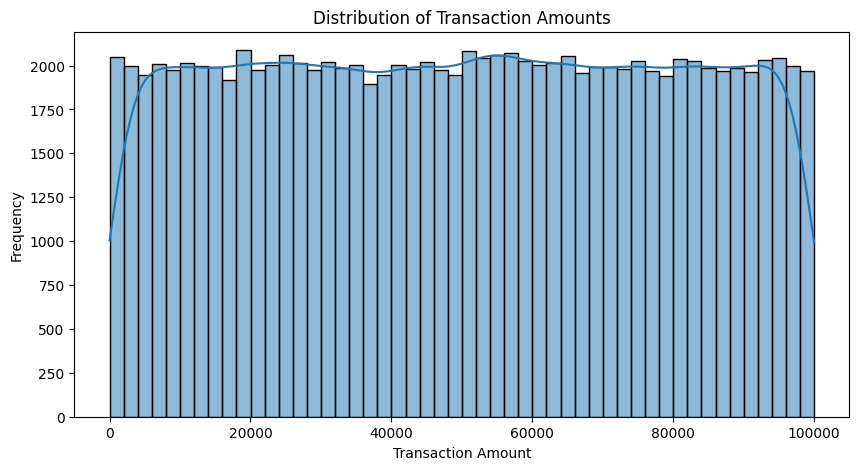

In [63]:
# Transaction Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Transaction_amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

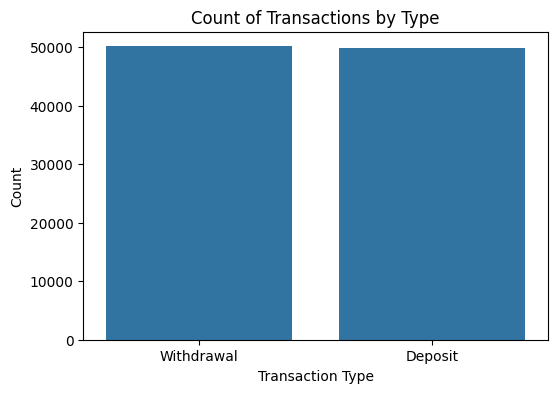

In [64]:
# Count of Transactions by Type
plt.figure(figsize=(6,4))
sns.countplot(x='Transaction_type', data=df)
plt.title("Count of Transactions by Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

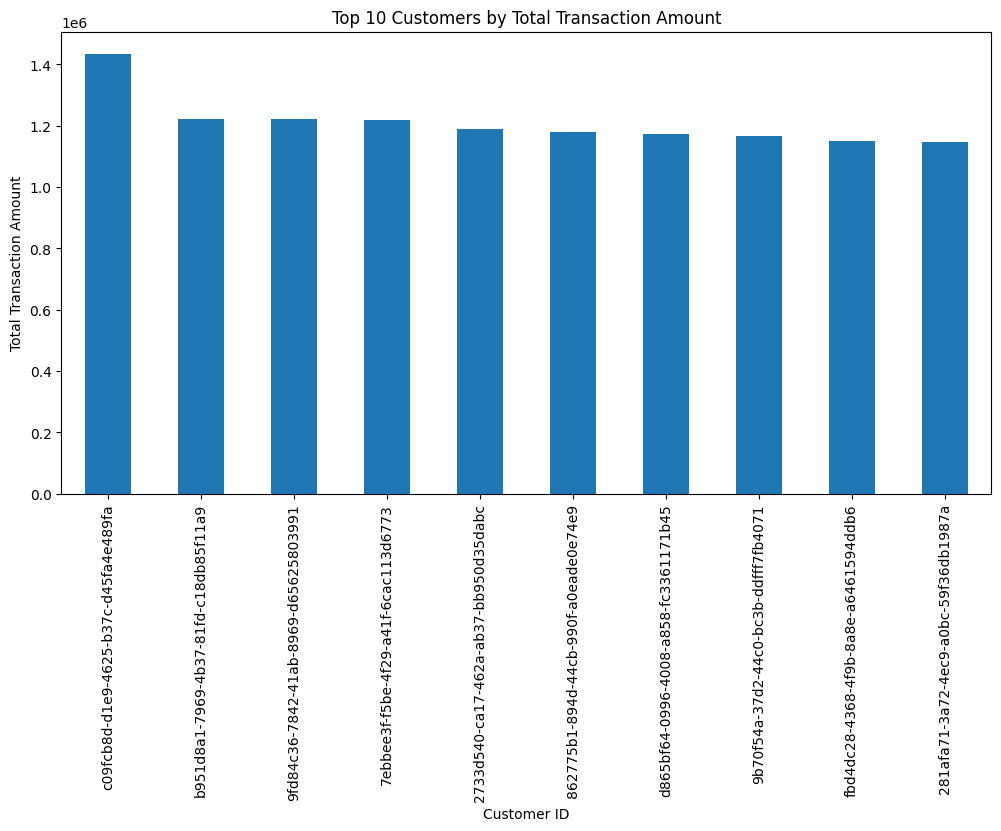

In [65]:
# Top 10 Customers with Highest Transactions
top_customers = df.groupby('Customer_id')['Transaction_amount'].sum().nlargest(10)
plt.figure(figsize=(12,6))
top_customers.plot(kind='bar')
plt.title("Top 10 Customers by Total Transaction Amount")
plt.xlabel("Customer ID")
plt.ylabel("Total Transaction Amount")
plt.xticks(rotation=90)
plt.show()

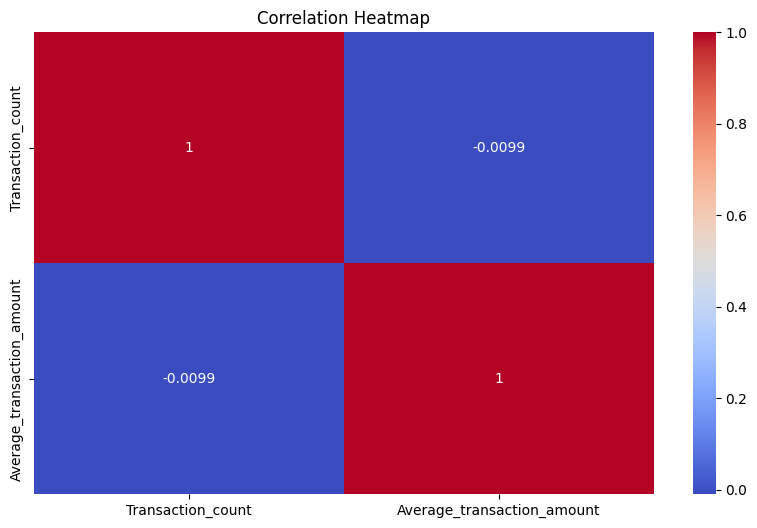

In [66]:
#correlation heatmap

plt.figure(figsize=(10,6))
sns.heatmap(customer_data.drop(columns=['Customer_id']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<Figure size 1500x1500 with 0 Axes>

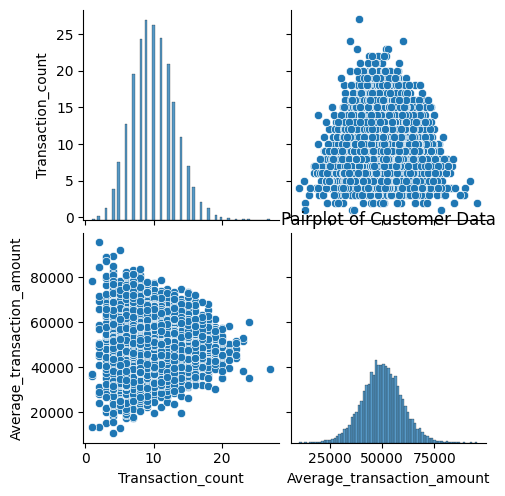

In [67]:
# pairplot
plt.figure(figsize=(15,15))
sns.pairplot(customer_data.drop(columns=['Customer_id']))
plt.title("Pairplot of Customer Data")
plt.show()

In [68]:
# Scaling the data using MinMaxScaler
scaler = MinMaxScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['Transaction_count', 'Average_transaction_amount']])

In [69]:
customer_data_scaled

array([[0.46153846, 0.56837421],
       [0.26923077, 0.6759215 ],
       [0.5       , 0.44201705],
       ...,
       [0.38461538, 0.53288488],
       [0.57692308, 0.39557736],
       [0.61538462, 0.51139791]])

In [70]:
# Elbow Method to find optimal K
wcss = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(customer_data_scaled)
    wcss.append(kmeans.inertia_)

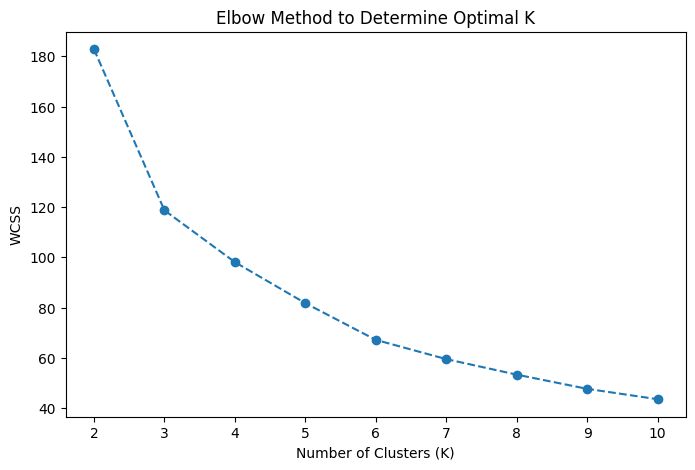

In [71]:
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal K')
plt.show()


In [72]:
# Apply K-Means with optimal K (K=3 based on the elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
customer_data['cluster'] = kmeans.fit_predict(customer_data_scaled)


In [73]:
# Compute Silhouette Score
silhouette_avg = silhouette_score(customer_data_scaled, customer_data['cluster'])
print(f'Silhouette Score for K={optimal_k}: {silhouette_avg:.4f}')

Silhouette Score for K=3: 0.3540


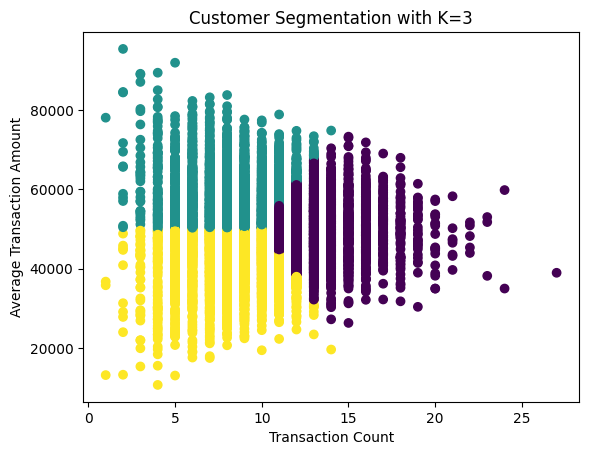

In [74]:
# Visualization of Clusters
plt.scatter(customer_data['Transaction_count'], customer_data['Average_transaction_amount'], c=customer_data['cluster'], cmap='viridis')
plt.xlabel('Transaction Count')
plt.ylabel('Average Transaction Amount')
plt.title(f'Customer Segmentation with K={optimal_k}')
plt.show()

In [75]:
# Applying Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
customer_data['cluster'] = agg_cluster.fit_predict(customer_data_scaled)

In [76]:
# Evaluation
silhouette_avg = silhouette_score(customer_data_scaled, customer_data['cluster'])
print(f'Silhouette Score: {silhouette_avg:.4f}')

Silhouette Score: 0.3073


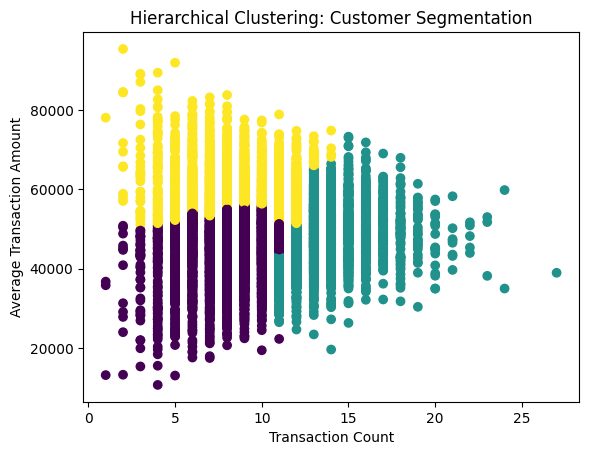

In [77]:
# Visualization
plt.scatter(customer_data['Transaction_count'], customer_data['Average_transaction_amount'], c=customer_data['cluster'])
plt.xlabel('Transaction Count')
plt.ylabel('Average Transaction Amount')
plt.title('Hierarchical Clustering: Customer Segmentation')
plt.show()


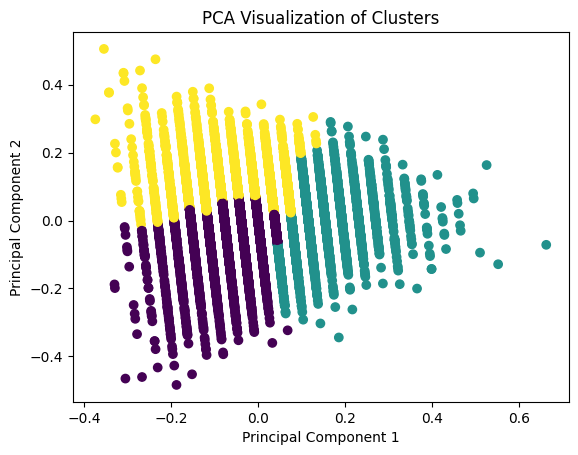

In [78]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(customer_data_scaled)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=customer_data['cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Clusters')
plt.show()


In [79]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(customer_data_scaled, customer_data['cluster'])
print(f'Davies-Bouldin Index: {db_index:.4f}')


Davies-Bouldin Index: 1.0394


In [80]:
for method in ['ward', 'complete', 'average', 'single']:
    agg = AgglomerativeClustering(n_clusters=3, linkage=method)
    clusters = agg.fit_predict(customer_data_scaled)
    score = silhouette_score(customer_data_scaled, clusters)
    print(f"Silhouette Score with {method} linkage: {score}")


Silhouette Score with ward linkage: 0.30729723293291783
Silhouette Score with complete linkage: 0.27167633058770035
Silhouette Score with average linkage: 0.4081102465784948
Silhouette Score with single linkage: 0.60953745198337


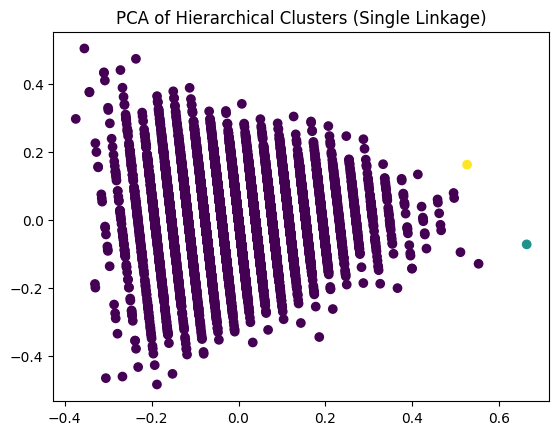

In [81]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(customer_data_scaled)

# Plot the clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.title('PCA of Hierarchical Clusters (Single Linkage)')
plt.show()


In [82]:
import joblib

joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']